## 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sb
import scipy.stats       as sp

In [2]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(777)

스케일러 라이브러리

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib

## 데이터 불러오기

In [58]:
inputdata = pd.read_csv('./ANN_Label/53_47_Label.csv', sep=',')
inputdata

,Unnamed: 0,1
0,0,0.001040
1,1,0.001311
2,2,0.000363
3,3,0.000404
4,4,0.000604
...,...,...
95,95,0.000798
96,96,0.001372
97,97,0.000753
98,98,0.000793


In [59]:
for i in range (100):
    temp_data = pd.read_csv('./test1/dp%d-preform-temp.csv'%(i+1),skiprows = 4, sep=',')
    s = "temp_dp%d = temp_data"%(i+1)
    exec(s)

# training, label 분리

In [60]:
temp_dp100

,Curve Length on Polyline 1 [ m ],TEMPERATURE [ K ]
0,0.000000,389.750000
1,0.002953,389.750000
2,0.005916,389.750000
3,0.008878,389.750000
4,0.011840,389.750000
...,...,...
32,0.093458,392.513092
33,0.096063,384.500000
34,0.098668,374.220978
35,0.101273,363.863098


In [61]:
TrainData_ = np.zeros((100,37))
for i in range (100):
    exec("TrainData_[i,:] = temp_dp%d.iloc[:,1]"%(i+1))

In [62]:
TrainData = pd.DataFrame(TrainData_)
TrainData

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,373.750000,373.750000,373.750000,373.750000,373.750000,373.750000,373.750000,373.750000,373.657806,373.540253,...,377.957092,378.389252,374.274780,367.468018,360.661255,354.408600,353.307526,353.255890,353.203827,353.149994
1,354.950012,354.950012,354.950012,354.950012,354.950012,354.950012,354.949982,354.950012,358.591217,363.235382,...,361.841492,358.276031,356.407104,355.542755,354.678406,353.884430,353.622620,353.467651,353.311493,353.149994
2,371.750000,371.750000,371.750000,371.750000,371.750000,371.750000,371.750000,371.750000,371.703918,371.645111,...,374.806030,369.079712,364.778473,361.321045,357.863647,354.687683,353.937683,353.679413,353.419159,353.149994
3,364.950012,364.950012,364.950012,364.950012,364.950012,364.950012,364.950012,364.950012,364.489075,363.901215,...,373.390411,378.900635,376.471191,369.340302,362.209381,355.658997,354.252747,353.891174,353.526825,353.149994
4,367.750000,367.750000,367.750000,367.750000,367.750000,367.750000,367.750000,367.750000,366.413361,364.708527,...,366.850708,360.800262,357.939240,356.966858,355.994476,355.101227,354.567841,354.102966,353.634521,353.149994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,355.750000,355.750000,355.750000,355.750000,355.750000,355.750000,355.750000,355.750000,357.132751,358.896362,...,384.462769,382.193848,383.046509,385.747620,388.448730,390.929901,383.239716,373.373932,363.432404,353.150024
96,367.350006,367.350006,367.350006,367.350006,367.350006,367.350006,367.350006,367.350006,367.949188,368.713409,...,372.129425,380.016632,384.442932,386.819885,389.196869,391.380310,383.554779,373.585693,363.540070,353.150024
97,370.149994,370.149994,370.149994,370.149994,370.149994,370.149994,370.149994,370.149994,369.689087,369.101227,...,379.676941,378.272400,380.192993,384.082550,387.972137,391.545074,383.869873,373.797455,363.647736,353.150024
98,362.950012,362.950012,362.950012,362.950012,362.950012,362.950012,362.949982,362.950012,365.208466,368.089050,...,361.013123,355.718994,360.332489,370.812744,381.292999,390.920074,384.184937,374.009216,363.755432,353.150024


In [63]:
TrainLabel_ = inputdata.iloc[:,1]
TrainLabel_

0     0.001040
1     0.001311
2     0.000363
3     0.000404
4     0.000604
        ...   
95    0.000798
96    0.001372
97    0.000753
98    0.000793
99    0.000894
Name: 1, Length: 100, dtype: float64

In [64]:
pd.set_option('display.max_rows',10)
TrainData

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,373.750000,373.750000,373.750000,373.750000,373.750000,373.750000,373.750000,373.750000,373.657806,373.540253,...,377.957092,378.389252,374.274780,367.468018,360.661255,354.408600,353.307526,353.255890,353.203827,353.149994
1,354.950012,354.950012,354.950012,354.950012,354.950012,354.950012,354.949982,354.950012,358.591217,363.235382,...,361.841492,358.276031,356.407104,355.542755,354.678406,353.884430,353.622620,353.467651,353.311493,353.149994
2,371.750000,371.750000,371.750000,371.750000,371.750000,371.750000,371.750000,371.750000,371.703918,371.645111,...,374.806030,369.079712,364.778473,361.321045,357.863647,354.687683,353.937683,353.679413,353.419159,353.149994
3,364.950012,364.950012,364.950012,364.950012,364.950012,364.950012,364.950012,364.950012,364.489075,363.901215,...,373.390411,378.900635,376.471191,369.340302,362.209381,355.658997,354.252747,353.891174,353.526825,353.149994
4,367.750000,367.750000,367.750000,367.750000,367.750000,367.750000,367.750000,367.750000,366.413361,364.708527,...,366.850708,360.800262,357.939240,356.966858,355.994476,355.101227,354.567841,354.102966,353.634521,353.149994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,355.750000,355.750000,355.750000,355.750000,355.750000,355.750000,355.750000,355.750000,357.132751,358.896362,...,384.462769,382.193848,383.046509,385.747620,388.448730,390.929901,383.239716,373.373932,363.432404,353.150024
96,367.350006,367.350006,367.350006,367.350006,367.350006,367.350006,367.350006,367.350006,367.949188,368.713409,...,372.129425,380.016632,384.442932,386.819885,389.196869,391.380310,383.554779,373.585693,363.540070,353.150024
97,370.149994,370.149994,370.149994,370.149994,370.149994,370.149994,370.149994,370.149994,369.689087,369.101227,...,379.676941,378.272400,380.192993,384.082550,387.972137,391.545074,383.869873,373.797455,363.647736,353.150024
98,362.950012,362.950012,362.950012,362.950012,362.950012,362.950012,362.949982,362.950012,365.208466,368.089050,...,361.013123,355.718994,360.332489,370.812744,381.292999,390.920074,384.184937,374.009216,363.755432,353.150024


In [65]:
pd.DataFrame(TrainLabel_)

,1
0,0.001040
1,0.001311
2,0.000363
3,0.000404
4,0.000604
...,...
95,0.000798
96,0.001372
97,0.000753
98,0.000793


In [66]:
max_value = np.max(TrainLabel_)
min_value = np.min(TrainLabel_)

dist_value = max_value - min_value

TrainLabel = pd.DataFrame(((TrainLabel_ - min_value)/dist_value)+0.5)

In [67]:
pd.set_option("Display.max_rows",10)
pd.DataFrame(TrainLabel)

,1
0,1.083109
1,1.316356
2,0.500000
3,0.535596
4,0.708158
...,...
95,0.874251
96,1.368639
97,0.836108
98,0.870224


## ANN hyperparameter 조절에 따른 학습성능 확인 

#### 지정 iteration마다 학습과정 확인 함수(Class) 정의

In [20]:
EpochForPrint = 100

class AccuracyPerEpoch(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        keras.callbacks.Callback()
        if epoch%EpochForPrint == 0:
            print("[{} Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
                  .format(epoch, np.sqrt(logs['mse']), logs['mae'], logs['mape']))

#### Hyperparameter 조합 설정

In [21]:
# 조정 하이퍼파라미터 : 학습율, 은닉층 뉴런 수
Lr = [0.001, 0.005, 0.01]   # Learning Rates
N1 = [30, 40, 50, 60, 70]   # Number of Neurons on Hidden Layer 1
N2 = [10, 20, 30]           # Number of Neurons on Hidden Layer 2

Model = ['thickness']

# 고정 하이퍼파라미터 : 입력/출력층 뉴런 수, 학습 Epoch 수
noOfNeuron_in  = 50
noOfNeuron_out = 1
Epoch          = 5000

print('Number of case : %d'%(len(Lr)*len(N1)*len(N2)))

Number of case : 45


### 모델 학습 1 - FFT 특징 기반 Wn1, Wn2, R1, R2 예측

In [22]:
for M in range(1):
    
    Tr_result_temp = np.zeros((len(Lr)*len(N1)*len(N2) , 7)) # *len(N2)
    cnt = 0
    
#     exec('Label_Trn = TrainLabel_%d'%(M+1))
    print('\n\n\n\n################## Model %d (Predict :'%(M+1) + Model[M] + ') ##################')

    for i in range(len(Lr)):
        learningRate = Lr[i]

        for j in range(len(N1)):
            noOfNeuron1 = N1[j]
            
            for k in range(len(N2)):
                noOfNeuron2 = N2[k]

                print('\n\nTrial No.%d'%(cnt+1))
                print('Prediction :' + Model[M])
                print('Learning rate : {:.3}'.format(learningRate))
                print('Hidden 1 neuron : %d'%(noOfNeuron1))
                print('Hidden 2 neuron : %d'%(noOfNeuron2))

                ################ 신경망 구조 재설계 ################

                tf.keras.backend.clear_session()
                def ANN_model(input_data):
                    model = keras.Sequential()
                    model.add(keras.layers.Dense(units = noOfNeuron_in,
                                                 input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
                    model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
                    model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
                    model.add(keras.layers.Dense(units = noOfNeuron_out,             )) # Output Layer
                    model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                                  loss=keras.losses.mean_absolute_error,
                                  metrics=['mse','mae','mape'])
                    return model
                model = ANN_model(TrainData)

                ################ 신경망 학습 ################

                hist = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
                print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
                      .format(np.sqrt(hist.history['mse'][-1]), hist.history['mae'][-1], hist.history['mape'][-1]))
                
                model.save('D:/testoneblow/MLmodels/Model_%d.h5'%(cnt+1))
                
                Tr_result_temp[cnt,0] = cnt+1
                Tr_result_temp[cnt,1] = learningRate
                Tr_result_temp[cnt,2] = noOfNeuron1
                Tr_result_temp[cnt,3] = noOfNeuron2
                Tr_result_temp[cnt,4] = np.sqrt(hist.history['mse'][-1])
                Tr_result_temp[cnt,5] = hist.history['mae'][-1]
                Tr_result_temp[cnt,6] = hist.history['mape'][-1]

                cnt=cnt+1


    Tr_result_temp_pd = pd.DataFrame(Tr_result_temp, columns=['Case', 'L.rate', 'Nr-HL1', 'Nr-HL2', 'RMSE', 'MAE', 'MAPE'])
    Tr_result_temp_pd.to_csv('D:/testoneblow/ANN_prediction5.0/Tr_result_epoch%d.csv'%(Epoch), index=None)





################## Model 1 (Predict :thickness) ##################


Trial No.1
Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 30
Hidden 2 neuron : 10
[0 Epochs]    RMSE:42.20449,   MAE: 41.98991,  MAPE: 4419.79%
[100 Epochs]    RMSE:3.51443,   MAE: 2.73097,  MAPE: 288.37%
[200 Epochs]    RMSE:3.02197,   MAE: 2.40472,  MAPE: 256.59%
[300 Epochs]    RMSE:1.99255,   MAE: 1.56462,  MAPE: 167.83%
[400 Epochs]    RMSE:1.71701,   MAE: 1.38103,  MAPE: 146.70%
[500 Epochs]    RMSE:1.51845,   MAE: 1.20428,  MAPE: 128.09%
[600 Epochs]    RMSE:1.13013,   MAE: 0.88157,  MAPE: 94.21%
[700 Epochs]    RMSE:2.51971,   MAE: 2.37673,  MAPE: 255.38%
[800 Epochs]    RMSE:2.03803,   MAE: 1.82037,  MAPE: 195.43%
[900 Epochs]    RMSE:1.83643,   MAE: 1.63159,  MAPE: 175.23%
[1000 Epochs]    RMSE:1.72475,   MAE: 1.52877,  MAPE: 164.04%
[1100 Epochs]    RMSE:1.60323,   MAE: 1.41387,  MAPE: 151.54%
[1200 Epochs]    RMSE:1.55889,   MAE: 1.38140,  MAPE: 147.97%
[1300 Epochs]    RMSE:1.51002,   M

[2600 Epochs]    RMSE:0.85624,   MAE: 0.74660,  MAPE: 86.18%
[2700 Epochs]    RMSE:0.91999,   MAE: 0.82137,  MAPE: 94.08%
[2800 Epochs]    RMSE:0.98572,   MAE: 0.89895,  MAPE: 102.16%
[2900 Epochs]    RMSE:0.93211,   MAE: 0.84496,  MAPE: 96.36%
[3000 Epochs]    RMSE:0.68938,   MAE: 0.58065,  MAPE: 68.26%
[3100 Epochs]    RMSE:0.88956,   MAE: 0.81061,  MAPE: 92.59%
[3200 Epochs]    RMSE:0.75234,   MAE: 0.66520,  MAPE: 77.02%
[3300 Epochs]    RMSE:0.82958,   MAE: 0.76108,  MAPE: 86.71%
[3400 Epochs]    RMSE:1.09119,   MAE: 1.05183,  MAPE: 116.79%
[3500 Epochs]    RMSE:0.75682,   MAE: 0.69400,  MAPE: 67.28%
[3600 Epochs]    RMSE:0.30093,   MAE: 0.25588,  MAPE: 29.92%
[3700 Epochs]    RMSE:0.56949,   MAE: 0.48406,  MAPE: 47.00%
[3800 Epochs]    RMSE:0.28236,   MAE: 0.22801,  MAPE: 22.66%
[3900 Epochs]    RMSE:0.22794,   MAE: 0.18597,  MAPE: 18.90%
[4000 Epochs]    RMSE:0.36452,   MAE: 0.31329,  MAPE: 30.18%
[4100 Epochs]    RMSE:0.28215,   MAE: 0.23236,  MAPE: 22.46%
[4200 Epochs]    RMSE:

[400 Epochs]    RMSE:1.42346,   MAE: 1.19691,  MAPE: 124.16%
[500 Epochs]    RMSE:1.13051,   MAE: 0.94487,  MAPE: 96.92%
[600 Epochs]    RMSE:1.19127,   MAE: 1.03441,  MAPE: 106.30%
[700 Epochs]    RMSE:1.28951,   MAE: 1.16568,  MAPE: 120.44%
[800 Epochs]    RMSE:1.99761,   MAE: 1.82716,  MAPE: 190.02%
[900 Epochs]    RMSE:0.89005,   MAE: 0.79160,  MAPE: 84.87%
[1000 Epochs]    RMSE:2.14768,   MAE: 2.10868,  MAPE: 218.97%
[1100 Epochs]    RMSE:1.23518,   MAE: 1.09584,  MAPE: 112.39%
[1200 Epochs]    RMSE:0.93449,   MAE: 0.78535,  MAPE: 80.09%
[1300 Epochs]    RMSE:1.21239,   MAE: 1.11794,  MAPE: 114.84%
[1400 Epochs]    RMSE:0.74429,   MAE: 0.61878,  MAPE: 62.63%
[1500 Epochs]    RMSE:0.74804,   MAE: 0.65915,  MAPE: 66.51%
[1600 Epochs]    RMSE:1.95292,   MAE: 1.92666,  MAPE: 199.62%
[1700 Epochs]    RMSE:0.68066,   MAE: 0.59015,  MAPE: 58.78%
[1800 Epochs]    RMSE:0.51925,   MAE: 0.46219,  MAPE: 51.65%
[1900 Epochs]    RMSE:1.38290,   MAE: 1.33937,  MAPE: 144.82%
[2000 Epochs]    RMSE

[3400 Epochs]    RMSE:1.12416,   MAE: 1.07151,  MAPE: 107.01%
[3500 Epochs]    RMSE:0.23732,   MAE: 0.18575,  MAPE: 18.13%
[3600 Epochs]    RMSE:1.54631,   MAE: 1.52132,  MAPE: 164.86%
[3700 Epochs]    RMSE:0.69521,   MAE: 0.62562,  MAPE: 61.10%
[3800 Epochs]    RMSE:0.88796,   MAE: 0.83330,  MAPE: 82.27%
[3900 Epochs]    RMSE:1.13721,   MAE: 1.09944,  MAPE: 120.91%
[4000 Epochs]    RMSE:0.52393,   MAE: 0.44561,  MAPE: 41.63%
[4100 Epochs]    RMSE:0.25717,   MAE: 0.19900,  MAPE: 18.63%
[4200 Epochs]    RMSE:0.18975,   MAE: 0.15156,  MAPE: 15.34%
[4300 Epochs]    RMSE:0.18396,   MAE: 0.14672,  MAPE: 16.45%
[4400 Epochs]    RMSE:0.19630,   MAE: 0.15663,  MAPE: 15.42%
[4500 Epochs]    RMSE:0.22228,   MAE: 0.17513,  MAPE: 16.51%
[4600 Epochs]    RMSE:0.23322,   MAE: 0.18991,  MAPE: 17.73%
[4700 Epochs]    RMSE:0.31637,   MAE: 0.27228,  MAPE: 25.44%
[4800 Epochs]    RMSE:0.31141,   MAE: 0.27345,  MAPE: 31.60%
[4900 Epochs]    RMSE:0.45943,   MAE: 0.41134,  MAPE: 38.75%

[Final Epochs]    RM

[1000 Epochs]    RMSE:1.45812,   MAE: 1.31384,  MAPE: 134.56%
[1100 Epochs]    RMSE:1.36149,   MAE: 1.22248,  MAPE: 124.65%
[1200 Epochs]    RMSE:1.37179,   MAE: 1.24227,  MAPE: 126.55%
[1300 Epochs]    RMSE:1.20071,   MAE: 1.06407,  MAPE: 107.32%
[1400 Epochs]    RMSE:4.59579,   MAE: 4.56549,  MAPE: 485.09%
[1500 Epochs]    RMSE:0.73838,   MAE: 0.65270,  MAPE: 65.10%
[1600 Epochs]    RMSE:0.98980,   MAE: 0.89745,  MAPE: 98.88%
[1700 Epochs]    RMSE:0.75350,   MAE: 0.61459,  MAPE: 69.31%
[1800 Epochs]    RMSE:0.56093,   MAE: 0.49093,  MAPE: 48.75%
[1900 Epochs]    RMSE:1.36468,   MAE: 1.32420,  MAPE: 143.54%
[2000 Epochs]    RMSE:0.29242,   MAE: 0.22944,  MAPE: 24.46%
[2100 Epochs]    RMSE:0.97682,   MAE: 0.93325,  MAPE: 93.86%
[2200 Epochs]    RMSE:0.97417,   MAE: 0.90123,  MAPE: 88.95%
[2300 Epochs]    RMSE:0.77499,   MAE: 0.69758,  MAPE: 68.09%
[2400 Epochs]    RMSE:1.20297,   MAE: 1.14046,  MAPE: 126.38%
[2500 Epochs]    RMSE:1.67507,   MAE: 1.62876,  MAPE: 164.86%
[2600 Epochs]   

[4000 Epochs]    RMSE:0.15971,   MAE: 0.12243,  MAPE: 13.58%
[4100 Epochs]    RMSE:0.20189,   MAE: 0.16817,  MAPE: 16.43%
[4200 Epochs]    RMSE:0.22901,   MAE: 0.19440,  MAPE: 18.73%
[4300 Epochs]    RMSE:0.20835,   MAE: 0.16416,  MAPE: 19.11%
[4400 Epochs]    RMSE:0.27570,   MAE: 0.23664,  MAPE: 26.85%
[4500 Epochs]    RMSE:0.16245,   MAE: 0.13057,  MAPE: 13.03%
[4600 Epochs]    RMSE:0.42275,   MAE: 0.39721,  MAPE: 44.17%
[4700 Epochs]    RMSE:0.16993,   MAE: 0.13037,  MAPE: 15.04%
[4800 Epochs]    RMSE:0.20764,   MAE: 0.16539,  MAPE: 19.07%
[4900 Epochs]    RMSE:0.28305,   MAE: 0.23812,  MAPE: 22.10%

[Final Epochs]    RMSE:0.17505,   MAE: 0.14116,  MAPE: 14.77%


Trial No.14
Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 70
Hidden 2 neuron : 20
[0 Epochs]    RMSE:270.23125,   MAE: 270.17929,  MAPE: 28442.40%
[100 Epochs]    RMSE:2.19549,   MAE: 1.73029,  MAPE: 183.45%
[200 Epochs]    RMSE:1.47247,   MAE: 1.17623,  MAPE: 120.30%
[300 Epochs]    RMSE:1.34712,   MAE: 1.1

[1800 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[1900 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[2000 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[2100 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[2200 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[2300 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[2400 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[2500 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[2600 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[2700 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[2800 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[2900 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[3000 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[3100 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[3200 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[3300 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[3400 Epochs]    RMSE:0.

[4800 Epochs]    RMSE:0.18453,   MAE: 0.14359,  MAPE: 15.46%
[4900 Epochs]    RMSE:0.18155,   MAE: 0.13900,  MAPE: 14.50%

[Final Epochs]    RMSE:0.20280,   MAE: 0.16029,  MAPE: 16.00%


Trial No.19
Prediction :thickness
Learning rate : 0.005
Hidden 1 neuron : 40
Hidden 2 neuron : 10
[0 Epochs]    RMSE:59.83060,   MAE: 59.55022,  MAPE: 6315.02%
[100 Epochs]    RMSE:0.55874,   MAE: 0.50800,  MAPE: 47.32%
[200 Epochs]    RMSE:0.25511,   MAE: 0.20467,  MAPE: 20.29%
[300 Epochs]    RMSE:0.23422,   MAE: 0.19481,  MAPE: 20.91%
[400 Epochs]    RMSE:0.23289,   MAE: 0.19445,  MAPE: 21.22%
[500 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[600 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[700 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[800 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[900 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[1000 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE: 21.22%
[1100 Epochs]    RMSE:0.23288,   MAE: 0.19445,  MAPE

[2600 Epochs]    RMSE:0.17396,   MAE: 0.13151,  MAPE: 13.87%
[2700 Epochs]    RMSE:0.19399,   MAE: 0.15168,  MAPE: 14.81%
[2800 Epochs]    RMSE:0.18580,   MAE: 0.13876,  MAPE: 14.35%
[2900 Epochs]    RMSE:0.17621,   MAE: 0.13149,  MAPE: 14.28%
[3000 Epochs]    RMSE:0.17559,   MAE: 0.13278,  MAPE: 14.49%
[3100 Epochs]    RMSE:0.16764,   MAE: 0.13294,  MAPE: 14.27%
[3200 Epochs]    RMSE:0.19419,   MAE: 0.14977,  MAPE: 14.98%
[3300 Epochs]    RMSE:0.19323,   MAE: 0.14548,  MAPE: 14.76%
[3400 Epochs]    RMSE:0.18168,   MAE: 0.14387,  MAPE: 15.98%
[3500 Epochs]    RMSE:0.21568,   MAE: 0.16898,  MAPE: 16.26%
[3600 Epochs]    RMSE:0.19316,   MAE: 0.14821,  MAPE: 16.29%
[3700 Epochs]    RMSE:0.19126,   MAE: 0.15066,  MAPE: 17.15%
[3800 Epochs]    RMSE:0.18352,   MAE: 0.13819,  MAPE: 14.56%
[3900 Epochs]    RMSE:0.19242,   MAE: 0.14846,  MAPE: 16.58%
[4000 Epochs]    RMSE:0.23502,   MAE: 0.19569,  MAPE: 22.29%
[4100 Epochs]    RMSE:0.23264,   MAE: 0.19413,  MAPE: 21.60%
[4200 Epochs]    RMSE:0.

[400 Epochs]    RMSE:0.20500,   MAE: 0.16294,  MAPE: 18.21%
[500 Epochs]    RMSE:0.41394,   MAE: 0.34238,  MAPE: 32.22%
[600 Epochs]    RMSE:0.22941,   MAE: 0.18437,  MAPE: 17.69%
[700 Epochs]    RMSE:0.24918,   MAE: 0.20376,  MAPE: 24.66%
[800 Epochs]    RMSE:0.19562,   MAE: 0.15256,  MAPE: 17.99%
[900 Epochs]    RMSE:0.19920,   MAE: 0.15766,  MAPE: 18.49%
[1000 Epochs]    RMSE:0.18051,   MAE: 0.13994,  MAPE: 16.08%
[1100 Epochs]    RMSE:0.64477,   MAE: 0.60225,  MAPE: 68.07%
[1200 Epochs]    RMSE:0.28882,   MAE: 0.23706,  MAPE: 28.99%
[1300 Epochs]    RMSE:0.23848,   MAE: 0.19770,  MAPE: 22.14%
[1400 Epochs]    RMSE:0.23825,   MAE: 0.19660,  MAPE: 21.98%
[1500 Epochs]    RMSE:0.23816,   MAE: 0.19617,  MAPE: 22.00%
[1600 Epochs]    RMSE:0.23770,   MAE: 0.19584,  MAPE: 21.94%
[1700 Epochs]    RMSE:0.23711,   MAE: 0.19541,  MAPE: 21.77%
[1800 Epochs]    RMSE:0.23599,   MAE: 0.19417,  MAPE: 21.36%
[1900 Epochs]    RMSE:0.23457,   MAE: 0.19192,  MAPE: 21.02%
[2000 Epochs]    RMSE:0.23344,

[3400 Epochs]    RMSE:0.18013,   MAE: 0.14440,  MAPE: 15.22%
[3500 Epochs]    RMSE:0.19512,   MAE: 0.15578,  MAPE: 15.48%
[3600 Epochs]    RMSE:0.18649,   MAE: 0.15122,  MAPE: 17.06%
[3700 Epochs]    RMSE:0.18468,   MAE: 0.14770,  MAPE: 15.30%
[3800 Epochs]    RMSE:0.24274,   MAE: 0.19572,  MAPE: 18.56%
[3900 Epochs]    RMSE:0.23802,   MAE: 0.19489,  MAPE: 23.19%
[4000 Epochs]    RMSE:0.18555,   MAE: 0.15164,  MAPE: 16.35%
[4100 Epochs]    RMSE:0.27951,   MAE: 0.22608,  MAPE: 21.59%
[4200 Epochs]    RMSE:0.22573,   MAE: 0.18495,  MAPE: 20.02%
[4300 Epochs]    RMSE:0.21866,   MAE: 0.17735,  MAPE: 19.25%
[4400 Epochs]    RMSE:0.21087,   MAE: 0.16925,  MAPE: 18.88%
[4500 Epochs]    RMSE:0.21517,   MAE: 0.17201,  MAPE: 20.01%
[4600 Epochs]    RMSE:0.19901,   MAE: 0.15949,  MAPE: 17.28%
[4700 Epochs]    RMSE:0.19731,   MAE: 0.15697,  MAPE: 16.65%
[4800 Epochs]    RMSE:0.19449,   MAE: 0.15750,  MAPE: 16.93%
[4900 Epochs]    RMSE:0.19397,   MAE: 0.15534,  MAPE: 16.27%

[Final Epochs]    RMSE:

[1200 Epochs]    RMSE:0.14836,   MAE: 0.11194,  MAPE: 12.25%
[1300 Epochs]    RMSE:0.23317,   MAE: 0.19920,  MAPE: 23.03%
[1400 Epochs]    RMSE:0.13838,   MAE: 0.11254,  MAPE: 12.41%
[1500 Epochs]    RMSE:0.13065,   MAE: 0.10022,  MAPE: 11.37%
[1600 Epochs]    RMSE:0.14018,   MAE: 0.11398,  MAPE: 12.63%
[1700 Epochs]    RMSE:0.23805,   MAE: 0.19859,  MAPE: 18.56%
[1800 Epochs]    RMSE:0.17325,   MAE: 0.14424,  MAPE: 16.31%
[1900 Epochs]    RMSE:0.14360,   MAE: 0.11613,  MAPE: 13.40%
[2000 Epochs]    RMSE:0.19175,   MAE: 0.15425,  MAPE: 16.64%
[2100 Epochs]    RMSE:0.19612,   MAE: 0.15468,  MAPE: 14.85%
[2200 Epochs]    RMSE:0.13439,   MAE: 0.10599,  MAPE: 11.12%
[2300 Epochs]    RMSE:0.31087,   MAE: 0.26440,  MAPE: 30.23%
[2400 Epochs]    RMSE:0.18168,   MAE: 0.14418,  MAPE: 15.36%
[2500 Epochs]    RMSE:0.16182,   MAE: 0.12582,  MAPE: 14.13%
[2600 Epochs]    RMSE:0.18049,   MAE: 0.14013,  MAPE: 13.69%
[2700 Epochs]    RMSE:0.17273,   MAE: 0.13309,  MAPE: 15.45%
[2800 Epochs]    RMSE:0.

[4200 Epochs]    RMSE:0.23289,   MAE: 0.19445,  MAPE: 21.22%
[4300 Epochs]    RMSE:0.23289,   MAE: 0.19445,  MAPE: 21.22%
[4400 Epochs]    RMSE:0.23289,   MAE: 0.19445,  MAPE: 21.22%
[4500 Epochs]    RMSE:0.23289,   MAE: 0.19445,  MAPE: 21.22%
[4600 Epochs]    RMSE:0.23289,   MAE: 0.19445,  MAPE: 21.22%
[4700 Epochs]    RMSE:0.23289,   MAE: 0.19445,  MAPE: 21.22%
[4800 Epochs]    RMSE:0.23289,   MAE: 0.19445,  MAPE: 21.22%
[4900 Epochs]    RMSE:0.23289,   MAE: 0.19445,  MAPE: 21.22%

[Final Epochs]    RMSE:0.23289,   MAE: 0.19445,  MAPE: 21.22%


Trial No.32
Prediction :thickness
Learning rate : 0.01
Hidden 1 neuron : 30
Hidden 2 neuron : 20
[0 Epochs]    RMSE:205.29140,   MAE: 205.19594,  MAPE: 21594.38%
[100 Epochs]    RMSE:0.89674,   MAE: 0.86524,  MAPE: 85.81%
[200 Epochs]    RMSE:0.23136,   MAE: 0.19167,  MAPE: 21.01%
[300 Epochs]    RMSE:0.22693,   MAE: 0.18780,  MAPE: 20.36%
[400 Epochs]    RMSE:0.22730,   MAE: 0.18675,  MAPE: 21.11%
[500 Epochs]    RMSE:0.22208,   MAE: 0.18185,

[2000 Epochs]    RMSE:0.20694,   MAE: 0.17070,  MAPE: 18.75%
[2100 Epochs]    RMSE:0.19459,   MAE: 0.15668,  MAPE: 17.59%
[2200 Epochs]    RMSE:0.18995,   MAE: 0.15279,  MAPE: 16.18%
[2300 Epochs]    RMSE:0.18844,   MAE: 0.15059,  MAPE: 16.27%
[2400 Epochs]    RMSE:0.21880,   MAE: 0.18089,  MAPE: 20.16%
[2500 Epochs]    RMSE:0.20379,   MAE: 0.16528,  MAPE: 18.39%
[2600 Epochs]    RMSE:0.22494,   MAE: 0.18352,  MAPE: 21.82%
[2700 Epochs]    RMSE:0.20017,   MAE: 0.15895,  MAPE: 16.33%
[2800 Epochs]    RMSE:0.19661,   MAE: 0.15832,  MAPE: 18.03%
[2900 Epochs]    RMSE:0.19932,   MAE: 0.15950,  MAPE: 18.36%
[3000 Epochs]    RMSE:0.18878,   MAE: 0.14882,  MAPE: 15.91%
[3100 Epochs]    RMSE:0.18778,   MAE: 0.14587,  MAPE: 15.75%
[3200 Epochs]    RMSE:0.18760,   MAE: 0.14698,  MAPE: 16.17%
[3300 Epochs]    RMSE:0.19004,   MAE: 0.15055,  MAPE: 15.72%
[3400 Epochs]    RMSE:0.18922,   MAE: 0.14849,  MAPE: 16.56%
[3500 Epochs]    RMSE:0.19994,   MAE: 0.16502,  MAPE: 17.79%
[3600 Epochs]    RMSE:0.


[Final Epochs]    RMSE:0.23264,   MAE: 0.19445,  MAPE: 21.43%


Trial No.37
Prediction :thickness
Learning rate : 0.01
Hidden 1 neuron : 50
Hidden 2 neuron : 10
[0 Epochs]    RMSE:73.00231,   MAE: 72.94789,  MAPE: 7671.94%
[100 Epochs]    RMSE:0.23204,   MAE: 0.19382,  MAPE: 21.69%
[200 Epochs]    RMSE:0.22943,   MAE: 0.19202,  MAPE: 21.01%
[300 Epochs]    RMSE:0.22664,   MAE: 0.18986,  MAPE: 20.61%
[400 Epochs]    RMSE:0.22211,   MAE: 0.18660,  MAPE: 20.26%
[500 Epochs]    RMSE:0.21816,   MAE: 0.18105,  MAPE: 19.03%
[600 Epochs]    RMSE:0.31164,   MAE: 0.25676,  MAPE: 23.28%
[700 Epochs]    RMSE:0.33773,   MAE: 0.28698,  MAPE: 34.71%
[800 Epochs]    RMSE:0.21452,   MAE: 0.17702,  MAPE: 18.57%
[900 Epochs]    RMSE:0.20478,   MAE: 0.17050,  MAPE: 18.86%
[1000 Epochs]    RMSE:0.24506,   MAE: 0.19775,  MAPE: 18.49%
[1100 Epochs]    RMSE:0.23149,   MAE: 0.18616,  MAPE: 22.50%
[1200 Epochs]    RMSE:0.19535,   MAE: 0.16096,  MAPE: 18.21%
[1300 Epochs]    RMSE:0.19576,   MAE: 0.15926,  MAPE:

[2800 Epochs]    RMSE:0.18644,   MAE: 0.14902,  MAPE: 16.07%
[2900 Epochs]    RMSE:0.18784,   MAE: 0.14990,  MAPE: 16.55%
[3000 Epochs]    RMSE:0.18797,   MAE: 0.14853,  MAPE: 15.70%
[3100 Epochs]    RMSE:0.19752,   MAE: 0.15613,  MAPE: 15.73%
[3200 Epochs]    RMSE:0.19485,   MAE: 0.15458,  MAPE: 15.68%
[3300 Epochs]    RMSE:0.18805,   MAE: 0.15153,  MAPE: 16.84%
[3400 Epochs]    RMSE:0.19524,   MAE: 0.15606,  MAPE: 17.81%
[3500 Epochs]    RMSE:0.18667,   MAE: 0.15032,  MAPE: 16.27%
[3600 Epochs]    RMSE:0.18801,   MAE: 0.14892,  MAPE: 15.65%
[3700 Epochs]    RMSE:0.18718,   MAE: 0.14738,  MAPE: 15.96%
[3800 Epochs]    RMSE:0.21496,   MAE: 0.16793,  MAPE: 16.33%
[3900 Epochs]    RMSE:0.18706,   MAE: 0.14731,  MAPE: 15.90%
[4000 Epochs]    RMSE:0.18661,   MAE: 0.14864,  MAPE: 16.18%
[4100 Epochs]    RMSE:0.18680,   MAE: 0.14980,  MAPE: 16.41%
[4200 Epochs]    RMSE:0.18668,   MAE: 0.14890,  MAPE: 16.24%
[4300 Epochs]    RMSE:0.19109,   MAE: 0.15209,  MAPE: 17.15%
[4400 Epochs]    RMSE:0.

[600 Epochs]    RMSE:0.19988,   MAE: 0.16406,  MAPE: 18.24%
[700 Epochs]    RMSE:0.21361,   MAE: 0.17651,  MAPE: 20.56%
[800 Epochs]    RMSE:0.21521,   MAE: 0.17287,  MAPE: 20.43%
[900 Epochs]    RMSE:0.19089,   MAE: 0.15348,  MAPE: 17.11%
[1000 Epochs]    RMSE:0.18992,   MAE: 0.15151,  MAPE: 15.43%
[1100 Epochs]    RMSE:0.19786,   MAE: 0.15593,  MAPE: 15.28%
[1200 Epochs]    RMSE:0.19378,   MAE: 0.15388,  MAPE: 17.12%
[1300 Epochs]    RMSE:0.18040,   MAE: 0.14420,  MAPE: 16.30%
[1400 Epochs]    RMSE:0.56407,   MAE: 0.51044,  MAPE: 47.72%
[1500 Epochs]    RMSE:0.22240,   MAE: 0.18258,  MAPE: 20.03%
[1600 Epochs]    RMSE:0.22028,   MAE: 0.17831,  MAPE: 18.97%
[1700 Epochs]    RMSE:0.21826,   MAE: 0.17488,  MAPE: 19.34%
[1800 Epochs]    RMSE:0.21441,   MAE: 0.17402,  MAPE: 19.42%
[1900 Epochs]    RMSE:0.21303,   MAE: 0.16782,  MAPE: 18.46%
[2000 Epochs]    RMSE:0.21032,   MAE: 0.16722,  MAPE: 17.26%
[2100 Epochs]    RMSE:0.21542,   MAE: 0.16922,  MAPE: 17.69%
[2200 Epochs]    RMSE:0.2160

[3600 Epochs]    RMSE:0.23270,   MAE: 0.19445,  MAPE: 21.33%
[3700 Epochs]    RMSE:0.23270,   MAE: 0.19445,  MAPE: 21.33%
[3800 Epochs]    RMSE:0.23270,   MAE: 0.19445,  MAPE: 21.33%
[3900 Epochs]    RMSE:0.23270,   MAE: 0.19445,  MAPE: 21.33%
[4000 Epochs]    RMSE:0.23270,   MAE: 0.19445,  MAPE: 21.33%
[4100 Epochs]    RMSE:0.23270,   MAE: 0.19445,  MAPE: 21.33%
[4200 Epochs]    RMSE:0.23270,   MAE: 0.19445,  MAPE: 21.33%
[4300 Epochs]    RMSE:0.23270,   MAE: 0.19445,  MAPE: 21.33%
[4400 Epochs]    RMSE:0.23270,   MAE: 0.19445,  MAPE: 21.33%
[4500 Epochs]    RMSE:0.23270,   MAE: 0.19445,  MAPE: 21.33%
[4600 Epochs]    RMSE:0.23270,   MAE: 0.19445,  MAPE: 21.33%
[4700 Epochs]    RMSE:0.23270,   MAE: 0.19445,  MAPE: 21.33%
[4800 Epochs]    RMSE:0.23270,   MAE: 0.19445,  MAPE: 21.33%
[4900 Epochs]    RMSE:0.23270,   MAE: 0.19445,  MAPE: 21.33%

[Final Epochs]    RMSE:0.23270,   MAE: 0.19445,  MAPE: 21.33%


Trial No.45
Prediction :thickness
Learning rate : 0.01
Hidden 1 neuron : 70
Hidde

### [Wn1, Wn2, R1, R2] 최고성능 모델 재학습 및 모델 & 히스토리 저장

In [71]:
for M in range(1):

    Tr_result_temp = pd.read_csv('D:/testoneblow/ANN_prediction5.0/53_47_Label prediction/Tr_result_epoch5000.csv')
    learningRate   = Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,1]
    noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,2])
    noOfNeuron2    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,3])
    Epoch          = 50000
    
    print('\n\n\nPrediction :' + Model[M])
    print('Learning rate : {:.3}'.format(learningRate))
    print('Hidden 1 neuron : %d'%(noOfNeuron1))
    print('Hidden 2 neuron : %d'%(noOfNeuron2))
    
#     exec('Label_Trn = TrainLabel_%d'%(M+1))
    
    ################ 신경망 구조 재설계 ################

    tf.keras.backend.clear_session()
    def ANN_model(input_data):
        model = keras.Sequential()
        model.add(keras.layers.Dense(units = noOfNeuron_in,
                                     input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
        model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
        model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
        model.add(keras.layers.Dense(units = noOfNeuron_out,               )) # Output Layer
        model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                      loss=keras.losses.mean_absolute_error,
                      metrics=['mse','mae','mape'])
        return model
    model = ANN_model(TrainData)

    ################ 신경망 학습 ################

    BestModel_temp = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
    print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
          .format(np.sqrt(BestModel_temp.history['mse'][-1]), BestModel_temp.history['mae'][-1], BestModel_temp.history['mape'][-1]))
    
    # 모델 저장
    model.save('D:/testoneblow/MLmodels/BestModel_2DOF_0410_M%d.h5'%(M+1))
    
    # 히스토리 저장
    RMSE  = np.sqrt(np.array(BestModel_temp.history['mse'])[:, np.newaxis])
    MAE   = np.array(BestModel_temp.history['mae'])[:, np.newaxis]
    MAPE  = np.array(BestModel_temp.history['mape'])[:, np.newaxis]

    History_temp = pd.DataFrame(np.concatenate([RMSE,MAE,MAPE],axis=1))
    History_temp.to_csv("D:/testoneblow/MLmodels/BestModel_2DOF_0410_M%d_history.csv"%(M+1), index=None)




Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 50
Hidden 2 neuron : 30
[0 Epochs]    RMSE:85.39397,   MAE: 85.26225,  MAPE: 8926.42%
[100 Epochs]    RMSE:2.47279,   MAE: 1.98450,  MAPE: 200.89%
[200 Epochs]    RMSE:2.49633,   MAE: 2.22699,  MAPE: 227.53%
[300 Epochs]    RMSE:0.90057,   MAE: 0.71781,  MAPE: 72.14%
[400 Epochs]    RMSE:2.17378,   MAE: 1.92564,  MAPE: 214.50%
[500 Epochs]    RMSE:1.95050,   MAE: 1.76091,  MAPE: 194.89%
[600 Epochs]    RMSE:1.97165,   MAE: 1.80224,  MAPE: 199.47%
[700 Epochs]    RMSE:1.61632,   MAE: 1.44367,  MAPE: 161.36%
[800 Epochs]    RMSE:1.35967,   MAE: 1.20676,  MAPE: 119.01%
[900 Epochs]    RMSE:0.61835,   MAE: 0.51737,  MAPE: 57.15%
[1000 Epochs]    RMSE:0.77035,   MAE: 0.63177,  MAPE: 60.07%
[1100 Epochs]    RMSE:1.07639,   MAE: 0.93881,  MAPE: 107.81%
[1200 Epochs]    RMSE:1.07905,   MAE: 1.02259,  MAPE: 102.18%
[1300 Epochs]    RMSE:0.60646,   MAE: 0.53581,  MAPE: 61.89%
[1400 Epochs]    RMSE:0.65809,   MAE: 0.55597,  MAPE: 52

[13400 Epochs]    RMSE:0.10823,   MAE: 0.07977,  MAPE: 8.17%
[13500 Epochs]    RMSE:0.08613,   MAE: 0.06020,  MAPE: 6.35%
[13600 Epochs]    RMSE:0.07886,   MAE: 0.05796,  MAPE: 5.97%
[13700 Epochs]    RMSE:0.09316,   MAE: 0.07321,  MAPE: 7.84%
[13800 Epochs]    RMSE:0.09547,   MAE: 0.07470,  MAPE: 7.62%
[13900 Epochs]    RMSE:0.10805,   MAE: 0.08848,  MAPE: 9.59%
[14000 Epochs]    RMSE:0.08316,   MAE: 0.05862,  MAPE: 6.15%
[14100 Epochs]    RMSE:0.08115,   MAE: 0.05998,  MAPE: 6.20%
[14200 Epochs]    RMSE:0.10370,   MAE: 0.08120,  MAPE: 8.14%
[14300 Epochs]    RMSE:0.08046,   MAE: 0.05588,  MAPE: 5.85%
[14400 Epochs]    RMSE:0.07781,   MAE: 0.05559,  MAPE: 5.62%
[14500 Epochs]    RMSE:0.08574,   MAE: 0.06604,  MAPE: 6.62%
[14600 Epochs]    RMSE:0.10561,   MAE: 0.08404,  MAPE: 8.69%
[14700 Epochs]    RMSE:0.07578,   MAE: 0.05803,  MAPE: 6.21%
[14800 Epochs]    RMSE:0.07126,   MAE: 0.05231,  MAPE: 5.53%
[14900 Epochs]    RMSE:0.08488,   MAE: 0.06537,  MAPE: 6.60%
[15000 Epochs]    RMSE:0

[27000 Epochs]    RMSE:0.04550,   MAE: 0.03444,  MAPE: 3.60%
[27100 Epochs]    RMSE:0.05023,   MAE: 0.03928,  MAPE: 4.26%
[27200 Epochs]    RMSE:0.05725,   MAE: 0.04549,  MAPE: 4.45%
[27300 Epochs]    RMSE:0.05144,   MAE: 0.03827,  MAPE: 4.00%
[27400 Epochs]    RMSE:0.03592,   MAE: 0.02805,  MAPE: 3.06%
[27500 Epochs]    RMSE:0.04830,   MAE: 0.03667,  MAPE: 3.83%
[27600 Epochs]    RMSE:0.05466,   MAE: 0.04538,  MAPE: 4.64%
[27700 Epochs]    RMSE:0.03004,   MAE: 0.02334,  MAPE: 2.42%
[27800 Epochs]    RMSE:0.06904,   MAE: 0.04948,  MAPE: 5.31%
[27900 Epochs]    RMSE:0.03297,   MAE: 0.02549,  MAPE: 2.70%
[28000 Epochs]    RMSE:0.03244,   MAE: 0.02607,  MAPE: 2.81%
[28100 Epochs]    RMSE:0.05239,   MAE: 0.04044,  MAPE: 4.25%
[28200 Epochs]    RMSE:0.04602,   MAE: 0.03722,  MAPE: 3.98%
[28300 Epochs]    RMSE:0.03332,   MAE: 0.02551,  MAPE: 2.80%
[28400 Epochs]    RMSE:0.04030,   MAE: 0.03213,  MAPE: 3.37%
[28500 Epochs]    RMSE:0.03877,   MAE: 0.03049,  MAPE: 3.11%
[28600 Epochs]    RMSE:0

[40600 Epochs]    RMSE:0.02113,   MAE: 0.01691,  MAPE: 1.84%
[40700 Epochs]    RMSE:0.03040,   MAE: 0.02328,  MAPE: 2.31%
[40800 Epochs]    RMSE:0.02215,   MAE: 0.01680,  MAPE: 1.78%
[40900 Epochs]    RMSE:0.03835,   MAE: 0.02830,  MAPE: 3.28%
[41000 Epochs]    RMSE:0.03021,   MAE: 0.02370,  MAPE: 2.49%
[41100 Epochs]    RMSE:0.02488,   MAE: 0.02016,  MAPE: 2.11%
[41200 Epochs]    RMSE:0.02623,   MAE: 0.02328,  MAPE: 2.41%
[41300 Epochs]    RMSE:0.03537,   MAE: 0.02865,  MAPE: 3.12%
[41400 Epochs]    RMSE:0.03159,   MAE: 0.02468,  MAPE: 2.68%
[41500 Epochs]    RMSE:0.03330,   MAE: 0.02531,  MAPE: 2.66%
[41600 Epochs]    RMSE:0.03257,   MAE: 0.02470,  MAPE: 2.61%
[41700 Epochs]    RMSE:0.01843,   MAE: 0.01521,  MAPE: 1.62%
[41800 Epochs]    RMSE:0.04215,   MAE: 0.03499,  MAPE: 3.73%
[41900 Epochs]    RMSE:0.03549,   MAE: 0.02913,  MAPE: 3.05%
[42000 Epochs]    RMSE:0.03359,   MAE: 0.02533,  MAPE: 2.72%
[42100 Epochs]    RMSE:0.02269,   MAE: 0.01779,  MAPE: 1.87%
[42200 Epochs]    RMSE:0

(0.0, 100.0)

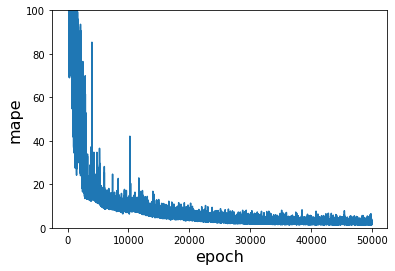

In [72]:
plt.plot(BestModel_temp.history['mape'])

plt.ylabel("mape", fontsize='16')
plt.xlabel("epoch", fontsize='16')
plt.ylim(0,100)

In [73]:
(model.predict(TrainData)-0.5)*dist_value+min_value

array([[0.00103637],
       [0.00133172],
       [0.00038661],
       [0.00039797],
       [0.00060605],
       [0.00094119],
       [0.00151446],
       [0.00104068],
       [0.00052084],
       [0.00127988],
       [0.00078383],
       [0.00066908],
       [0.00083878],
       [0.0009681 ],
       [0.00102593],
       [0.0007412 ],
       [0.00134333],
       [0.00057888],
       [0.00146132],
       [0.00087812],
       [0.00101501],
       [0.00114675],
       [0.00077767],
       [0.00121796],
       [0.0011332 ],
       [0.00043699],
       [0.00069999],
       [0.00120276],
       [0.00092418],
       [0.00057666],
       [0.00047772],
       [0.00098888],
       [0.00075549],
       [0.00145522],
       [0.00081082],
       [0.00087657],
       [0.00094948],
       [0.00060781],
       [0.00127606],
       [0.00115912],
       [0.00088574],
       [0.00124275],
       [0.00109478],
       [0.00081883],
       [0.00076606],
       [0.00075703],
       [0.0009648 ],
       [0.000

In [74]:
type(TrainLabel_)

pandas.core.series.Series

In [75]:
TrainLabel_

0     0.001040
1     0.001311
2     0.000363
3     0.000404
4     0.000604
        ...   
95    0.000798
96    0.001372
97    0.000753
98    0.000793
99    0.000894
Name: 1, Length: 100, dtype: float64

In [76]:
ErrorTable = np.zeros((TrainLabel.shape[0],4))
ErrorTable[:,0] = TrainLabel_
for i in range(TrainLabel.shape[0]):
    a = ((model.predict(TrainData)-0.5)*dist_value+min_value)[i]
    ErrorTable[i,1] = a
    ErrorTable[i,2] = ((TrainLabel_[i]-a)/TrainLabel_[i])*100
    ErrorTable[i,3] = np.abs(((TrainLabel_[i]-a)/TrainLabel_[i])*100)

In [77]:
ErrorTable = pd.DataFrame(ErrorTable)
ErrorTable

,0,1,2,3
0,0.001040,0.001036,0.379310,0.379310
1,0.001311,0.001332,-1.547023,1.547023
2,0.000363,0.000387,-6.642012,6.642012
3,0.000404,0.000398,1.469763,1.469763
4,0.000604,0.000606,-0.258991,0.258991
...,...,...,...,...
95,0.000798,0.000823,-3.176878,3.176878
96,0.001372,0.001375,-0.175394,0.175394
97,0.000753,0.000771,-2.324807,2.324807
98,0.000793,0.000821,-3.514479,3.514479


In [78]:
np.mean(ErrorTable.iloc[:,3])

2.8096660714410246

In [79]:
ErrorTable.to_csv('D:/testoneblow/ANN_prediction5.0/ErrorTable.csv')

## K fold

In [80]:
Fold = 5
FoldDataNo = int(TrainData.shape[0]/Fold)
FoldDataNo

20

In [81]:
TrainData.shape

(100, 37)

In [82]:
TrainLabel

,1
0,1.083109
1,1.316356
2,0.500000
3,0.535596
4,0.708158
...,...
95,0.874251
96,1.368639
97,0.836108
98,0.870224


In [83]:
#Validation dataset
for i in range(Fold):
    
    temp_Valid_Data   = TrainData.iloc[FoldDataNo*i:FoldDataNo*(i+1) ,:]
    s1 = 'ValidData_Fold%d = temp_Valid_Data'%(i+1)
    exec(s1)
    
    temp_Valid_Label  = TrainLabel.iloc[FoldDataNo*i:FoldDataNo*(i+1) ,:]
    s2 = 'ValidLabel_Fold%d = temp_Valid_Label'%(i+1)
    exec(s2)

ValidData_Fold1

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,373.750000,373.750000,373.750000,373.750000,373.750000,373.750000,373.750000,373.750000,373.657806,373.540253,...,377.957092,378.389252,374.274780,367.468018,360.661255,354.408600,353.307526,353.255890,353.203827,353.149994
1,354.950012,354.950012,354.950012,354.950012,354.950012,354.950012,354.949982,354.950012,358.591217,363.235382,...,361.841492,358.276031,356.407104,355.542755,354.678406,353.884430,353.622620,353.467651,353.311493,353.149994
2,371.750000,371.750000,371.750000,371.750000,371.750000,371.750000,371.750000,371.750000,371.703918,371.645111,...,374.806030,369.079712,364.778473,361.321045,357.863647,354.687683,353.937683,353.679413,353.419159,353.149994
3,364.950012,364.950012,364.950012,364.950012,364.950012,364.950012,364.950012,364.950012,364.489075,363.901215,...,373.390411,378.900635,376.471191,369.340302,362.209381,355.658997,354.252747,353.891174,353.526825,353.149994
4,367.750000,367.750000,367.750000,367.750000,367.750000,367.750000,367.750000,367.750000,366.413361,364.708527,...,366.850708,360.800262,357.939240,356.966858,355.994476,355.101227,354.567841,354.102966,353.634521,353.149994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,361.350006,361.350006,361.350006,361.350006,361.350006,361.350006,361.350006,361.350006,363.977203,367.328064,...,369.020905,373.342651,372.303436,368.089722,363.876007,360.005310,358.033661,356.432404,354.818878,353.149994
16,368.149994,368.149994,368.149994,368.149994,368.149994,368.149994,368.149994,368.149994,370.085846,372.554901,...,384.265594,388.263214,384.660431,376.557159,368.453857,361.010223,358.348755,356.644196,354.926544,353.149994
17,385.750000,385.750000,385.750000,385.750000,385.750000,385.750000,385.750000,385.750000,385.888275,386.064636,...,374.688293,367.881531,364.467804,363.063232,361.658661,360.368439,358.663818,356.855957,355.034210,353.149994
18,357.350006,357.350006,357.350006,357.350006,357.350006,357.350006,357.350006,357.350006,358.456177,359.867096,...,379.313110,389.253113,387.453278,378.701721,369.950165,361.911041,358.978882,357.067719,355.141876,353.149994


In [84]:
#Training Dataset
for i in range(Fold):
    temp_Train_Data_Front = TrainData.iloc[:FoldDataNo*i,:]
    temp_Train_Data_Back  = TrainData.iloc[FoldDataNo*(i+1):,:]
    temp_Train_Data_Total = np.concatenate([temp_Train_Data_Front , temp_Train_Data_Back] , axis=0)
    s1 ='TrainData_Fold%d  = temp_Train_Data_Total'%(i+1)
    exec(s1)

    temp_Train_Label_Front = TrainLabel.iloc[:FoldDataNo*i,:]
    temp_Train_Label_Back  = TrainLabel.iloc[FoldDataNo*(i+1):,:]
    temp_Train_Label_Total = np.concatenate([temp_Train_Label_Front , temp_Train_Label_Back] , axis=0)
    s2 ='TrainLabel_Fold%d  = temp_Train_Label_Total'%(i+1)
    exec(s2)
    
TrainData_Fold1.shape , TrainLabel_Fold1.shape

((80, 37), (80, 1))

In [85]:
Model = ['thickness']

# 고정 하이퍼파라미터 : 입력/출력층 뉴런 수, 학습 Epoch 수
noOfNeuron_in  = 50
noOfNeuron_out = 1

In [86]:
for F in range(Fold):
    s1 = 'TrainData  = TrainData_Fold%d'%(F+1)
    exec(s1)
    s2 = 'TrainLabel = TrainLabel_Fold%d'%(F+1)
    exec(s2)
    
    for M in range(1):

        Tr_result_temp = pd.read_csv('D:/testoneblow/ANN_prediction5.0/53_47_Label prediction_epoch50000/Tr_result_epoch5000.csv')
        learningRate   = Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,1]
        noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,2])
        noOfNeuron2    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,3])
        Epoch          = 20000

        print('\n\n\nPrediction :' + Model[M])
        print('Learning rate : {:.3}'.format(learningRate))
        print('Hidden 1 neuron : %d'%(noOfNeuron1))
        print('Hidden 2 neuron : %d'%(noOfNeuron2))

    #     exec('Label_Trn = TrainLabel_%d'%(M+1))

        ################ 신경망 구조 재설계 ################

        tf.keras.backend.clear_session()
        def ANN_model(input_data):
            model = keras.Sequential()
            model.add(keras.layers.Dense(units = noOfNeuron_in,
                                         input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
            model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
            model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
            model.add(keras.layers.Dense(units = noOfNeuron_out,               )) # Output Layer
            model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                          loss=keras.losses.mean_absolute_error,
                          metrics=['mse','mae','mape'])
            return model
        model = ANN_model(TrainData)

        ################ 신경망 학습 ################

        BestModel_temp = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
        print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
              .format(np.sqrt(BestModel_temp.history['mse'][-1]), BestModel_temp.history['mae'][-1], BestModel_temp.history['mape'][-1]))

        # 모델 저장
        model.save('D:/testoneblow/ANN_prediction5.0/53_47_Label prediction_epoch50000/k-fold/BestModel_M%d_Fold%d.h5'%(M+1,F+1))

        # 히스토리 저장
        RMSE  = np.sqrt(np.array(BestModel_temp.history['mse'])[:, np.newaxis])
        MAE   = np.array(BestModel_temp.history['mae'])[:, np.newaxis]
        MAPE  = np.array(BestModel_temp.history['mape'])[:, np.newaxis]

        History_temp = pd.DataFrame(np.concatenate([RMSE,MAE,MAPE],axis=1))
        History_temp.to_csv("D:/testoneblow/ANN_prediction5.0/53_47_Label prediction_epoch50000/k-fold/BestModel_M%d_Fold%d_history.csv"%(M+1,F+1), index=None)




Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 50
Hidden 2 neuron : 30
[0 Epochs]    RMSE:727.98330,   MAE: 727.90100,  MAPE: 75303.52%
[100 Epochs]    RMSE:0.85216,   MAE: 0.65112,  MAPE: 70.36%
[200 Epochs]    RMSE:0.62860,   MAE: 0.47764,  MAPE: 50.08%
[300 Epochs]    RMSE:0.44424,   MAE: 0.33638,  MAPE: 34.89%
[400 Epochs]    RMSE:0.66692,   MAE: 0.59304,  MAPE: 65.08%
[500 Epochs]    RMSE:0.59955,   MAE: 0.53930,  MAPE: 59.15%
[600 Epochs]    RMSE:0.42122,   MAE: 0.36030,  MAPE: 39.99%
[700 Epochs]    RMSE:2.01740,   MAE: 2.00225,  MAPE: 210.66%
[800 Epochs]    RMSE:0.76340,   MAE: 0.72699,  MAPE: 71.59%
[900 Epochs]    RMSE:0.65813,   MAE: 0.61580,  MAPE: 59.99%
[1000 Epochs]    RMSE:0.78426,   MAE: 0.74836,  MAPE: 75.06%
[1100 Epochs]    RMSE:0.47968,   MAE: 0.42902,  MAPE: 41.31%
[1200 Epochs]    RMSE:0.43483,   MAE: 0.38483,  MAPE: 36.73%
[1300 Epochs]    RMSE:0.40876,   MAE: 0.35881,  MAPE: 34.02%
[1400 Epochs]    RMSE:0.41293,   MAE: 0.36379,  MAPE: 34.30%


[13400 Epochs]    RMSE:0.08326,   MAE: 0.05186,  MAPE: 5.05%
[13500 Epochs]    RMSE:0.10477,   MAE: 0.08280,  MAPE: 8.02%
[13600 Epochs]    RMSE:0.08028,   MAE: 0.05447,  MAPE: 5.59%
[13700 Epochs]    RMSE:0.08430,   MAE: 0.05811,  MAPE: 5.66%
[13800 Epochs]    RMSE:0.08570,   MAE: 0.05807,  MAPE: 5.54%
[13900 Epochs]    RMSE:0.07969,   MAE: 0.05412,  MAPE: 5.40%
[14000 Epochs]    RMSE:0.08272,   MAE: 0.05808,  MAPE: 5.57%
[14100 Epochs]    RMSE:0.08055,   MAE: 0.06242,  MAPE: 6.41%
[14200 Epochs]    RMSE:0.07796,   MAE: 0.05224,  MAPE: 5.26%
[14300 Epochs]    RMSE:0.07259,   MAE: 0.04917,  MAPE: 4.99%
[14400 Epochs]    RMSE:0.08100,   MAE: 0.05718,  MAPE: 5.79%
[14500 Epochs]    RMSE:0.06945,   MAE: 0.04243,  MAPE: 4.26%
[14600 Epochs]    RMSE:0.07728,   MAE: 0.05392,  MAPE: 5.51%
[14700 Epochs]    RMSE:0.07068,   MAE: 0.04621,  MAPE: 4.63%
[14800 Epochs]    RMSE:0.06863,   MAE: 0.04318,  MAPE: 4.39%
[14900 Epochs]    RMSE:0.07768,   MAE: 0.05600,  MAPE: 5.83%
[15000 Epochs]    RMSE:0

[6600 Epochs]    RMSE:0.18731,   MAE: 0.14775,  MAPE: 14.52%
[6700 Epochs]    RMSE:0.18456,   MAE: 0.14879,  MAPE: 16.81%
[6800 Epochs]    RMSE:0.17046,   MAE: 0.13638,  MAPE: 15.43%
[6900 Epochs]    RMSE:0.19746,   MAE: 0.15397,  MAPE: 14.64%
[7000 Epochs]    RMSE:0.16231,   MAE: 0.12159,  MAPE: 12.37%
[7100 Epochs]    RMSE:0.17418,   MAE: 0.13203,  MAPE: 12.91%
[7200 Epochs]    RMSE:0.37546,   MAE: 0.33820,  MAPE: 38.72%
[7300 Epochs]    RMSE:0.26892,   MAE: 0.23002,  MAPE: 26.26%
[7400 Epochs]    RMSE:0.22199,   MAE: 0.18098,  MAPE: 17.39%
[7500 Epochs]    RMSE:0.21061,   MAE: 0.16564,  MAPE: 16.18%
[7600 Epochs]    RMSE:0.21984,   MAE: 0.17800,  MAPE: 20.95%
[7700 Epochs]    RMSE:0.16653,   MAE: 0.12970,  MAPE: 14.23%
[7800 Epochs]    RMSE:0.19782,   MAE: 0.15163,  MAPE: 14.56%
[7900 Epochs]    RMSE:0.15636,   MAE: 0.11578,  MAPE: 11.88%
[8000 Epochs]    RMSE:0.16505,   MAE: 0.12165,  MAPE: 12.13%
[8100 Epochs]    RMSE:0.17114,   MAE: 0.13181,  MAPE: 13.11%
[8200 Epochs]    RMSE:0.


[Final Epochs]    RMSE:0.06064,   MAE: 0.04559,  MAPE: 4.99%



Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 50
Hidden 2 neuron : 30
[0 Epochs]    RMSE:66.68410,   MAE: 66.61224,  MAPE: 6958.67%
[100 Epochs]    RMSE:1.94236,   MAE: 1.53279,  MAPE: 168.14%
[200 Epochs]    RMSE:1.40303,   MAE: 1.09627,  MAPE: 121.90%
[300 Epochs]    RMSE:2.40916,   MAE: 2.13118,  MAPE: 233.81%
[400 Epochs]    RMSE:2.02747,   MAE: 1.76636,  MAPE: 195.10%
[500 Epochs]    RMSE:1.84945,   MAE: 1.60243,  MAPE: 177.74%
[600 Epochs]    RMSE:1.66453,   MAE: 1.42021,  MAPE: 158.37%
[700 Epochs]    RMSE:1.57963,   MAE: 1.36221,  MAPE: 152.27%
[800 Epochs]    RMSE:2.09452,   MAE: 1.96458,  MAPE: 196.53%
[900 Epochs]    RMSE:0.60466,   MAE: 0.51393,  MAPE: 52.26%
[1000 Epochs]    RMSE:1.55436,   MAE: 1.41225,  MAPE: 155.84%
[1100 Epochs]    RMSE:1.18696,   MAE: 1.00745,  MAPE: 113.55%
[1200 Epochs]    RMSE:0.85958,   MAE: 0.69515,  MAPE: 79.41%
[1300 Epochs]    RMSE:0.45081,   MAE: 0.39683,  MAPE: 

[13200 Epochs]    RMSE:0.09499,   MAE: 0.06657,  MAPE: 7.04%
[13300 Epochs]    RMSE:0.11307,   MAE: 0.09562,  MAPE: 10.50%
[13400 Epochs]    RMSE:0.11294,   MAE: 0.09124,  MAPE: 10.26%
[13500 Epochs]    RMSE:0.10229,   MAE: 0.07939,  MAPE: 8.20%
[13600 Epochs]    RMSE:0.10566,   MAE: 0.07666,  MAPE: 8.24%
[13700 Epochs]    RMSE:0.15893,   MAE: 0.11522,  MAPE: 11.52%
[13800 Epochs]    RMSE:0.10752,   MAE: 0.08723,  MAPE: 8.76%
[13900 Epochs]    RMSE:0.08458,   MAE: 0.06268,  MAPE: 6.85%
[14000 Epochs]    RMSE:0.08860,   MAE: 0.06420,  MAPE: 6.61%
[14100 Epochs]    RMSE:0.08923,   MAE: 0.06457,  MAPE: 7.02%
[14200 Epochs]    RMSE:0.08975,   MAE: 0.07027,  MAPE: 7.67%
[14300 Epochs]    RMSE:0.08198,   MAE: 0.05962,  MAPE: 6.40%
[14400 Epochs]    RMSE:0.09238,   MAE: 0.06286,  MAPE: 6.29%
[14500 Epochs]    RMSE:0.07976,   MAE: 0.05439,  MAPE: 5.72%
[14600 Epochs]    RMSE:0.08419,   MAE: 0.06347,  MAPE: 7.00%
[14700 Epochs]    RMSE:0.08759,   MAE: 0.06011,  MAPE: 6.11%
[14800 Epochs]    RMS

[6400 Epochs]    RMSE:0.15174,   MAE: 0.12069,  MAPE: 13.73%
[6500 Epochs]    RMSE:0.15152,   MAE: 0.11900,  MAPE: 11.88%
[6600 Epochs]    RMSE:0.12600,   MAE: 0.09155,  MAPE: 10.38%
[6700 Epochs]    RMSE:0.18452,   MAE: 0.14229,  MAPE: 16.80%
[6800 Epochs]    RMSE:0.13444,   MAE: 0.10265,  MAPE: 10.54%
[6900 Epochs]    RMSE:0.12044,   MAE: 0.09146,  MAPE: 9.98%
[7000 Epochs]    RMSE:0.16829,   MAE: 0.12708,  MAPE: 12.93%
[7100 Epochs]    RMSE:0.15227,   MAE: 0.12367,  MAPE: 14.44%
[7200 Epochs]    RMSE:0.11685,   MAE: 0.08463,  MAPE: 9.35%
[7300 Epochs]    RMSE:0.12166,   MAE: 0.09431,  MAPE: 9.89%
[7400 Epochs]    RMSE:0.21393,   MAE: 0.18193,  MAPE: 20.94%
[7500 Epochs]    RMSE:0.14792,   MAE: 0.11976,  MAPE: 13.56%
[7600 Epochs]    RMSE:0.13818,   MAE: 0.10867,  MAPE: 11.45%
[7700 Epochs]    RMSE:0.17133,   MAE: 0.14184,  MAPE: 14.20%
[7800 Epochs]    RMSE:0.12008,   MAE: 0.09051,  MAPE: 9.32%
[7900 Epochs]    RMSE:0.12471,   MAE: 0.09725,  MAPE: 11.23%
[8000 Epochs]    RMSE:0.1117


[Final Epochs]    RMSE:0.05808,   MAE: 0.04405,  MAPE: 4.60%



Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 50
Hidden 2 neuron : 30
[0 Epochs]    RMSE:238.05542,   MAE: 238.02136,  MAPE: 25120.55%
[100 Epochs]    RMSE:1.86268,   MAE: 1.60974,  MAPE: 165.90%
[200 Epochs]    RMSE:1.61733,   MAE: 1.32136,  MAPE: 145.29%
[300 Epochs]    RMSE:1.96399,   MAE: 1.59102,  MAPE: 178.16%
[400 Epochs]    RMSE:2.98728,   MAE: 2.78237,  MAPE: 284.33%
[500 Epochs]    RMSE:3.89662,   MAE: 3.75882,  MAPE: 387.98%
[600 Epochs]    RMSE:4.07445,   MAE: 3.95394,  MAPE: 426.13%
[700 Epochs]    RMSE:0.79950,   MAE: 0.66279,  MAPE: 66.48%
[800 Epochs]    RMSE:0.57793,   MAE: 0.48031,  MAPE: 49.14%
[900 Epochs]    RMSE:1.43791,   MAE: 1.28471,  MAPE: 138.23%
[1000 Epochs]    RMSE:1.55796,   MAE: 1.41428,  MAPE: 152.00%
[1100 Epochs]    RMSE:1.36391,   MAE: 1.20928,  MAPE: 130.58%
[1200 Epochs]    RMSE:1.19438,   MAE: 1.02974,  MAPE: 111.50%
[1300 Epochs]    RMSE:1.08325,   MAE: 0.92033,  MAP

[13200 Epochs]    RMSE:0.11375,   MAE: 0.08676,  MAPE: 9.35%
[13300 Epochs]    RMSE:0.11971,   MAE: 0.09573,  MAPE: 10.40%
[13400 Epochs]    RMSE:0.11329,   MAE: 0.08327,  MAPE: 8.84%
[13500 Epochs]    RMSE:0.13609,   MAE: 0.10726,  MAPE: 12.23%
[13600 Epochs]    RMSE:0.10636,   MAE: 0.08027,  MAPE: 8.64%
[13700 Epochs]    RMSE:0.12705,   MAE: 0.10016,  MAPE: 11.03%
[13800 Epochs]    RMSE:0.12446,   MAE: 0.09727,  MAPE: 10.34%
[13900 Epochs]    RMSE:0.14234,   MAE: 0.11268,  MAPE: 12.98%
[14000 Epochs]    RMSE:0.11103,   MAE: 0.08322,  MAPE: 9.05%
[14100 Epochs]    RMSE:0.12399,   MAE: 0.10389,  MAPE: 11.42%
[14200 Epochs]    RMSE:0.12126,   MAE: 0.08963,  MAPE: 9.83%
[14300 Epochs]    RMSE:0.13670,   MAE: 0.10759,  MAPE: 11.98%
[14400 Epochs]    RMSE:0.11656,   MAE: 0.08959,  MAPE: 9.30%
[14500 Epochs]    RMSE:0.24911,   MAE: 0.21856,  MAPE: 21.20%
[14600 Epochs]    RMSE:0.13921,   MAE: 0.11370,  MAPE: 11.93%
[14700 Epochs]    RMSE:0.15715,   MAE: 0.11719,  MAPE: 13.45%
[14800 Epochs]

In [87]:
for F in range(Fold):
    s = "Model_Fold%d = keras.models.load_model('D:/testoneblow/ANN_prediction5.0/53_47_Label prediction_epoch50000/k-fold/BestModel_M1_Fold%d.h5')"%(F+1,F+1)
    exec(s)
    

In [88]:
for F in range (Fold):
    s1 = "real = ((ValidLabel_Fold%d)-0.5)*dist_value+min_value"%(F+1)
    exec(s1)
    s2 = "predict = (Model_Fold%d.predict(ValidData_Fold%d)-0.5)*dist_value+min_value"%(F+1,F+1)
    exec(s2)
    s3 = 'Result_Fold%d =  pd.DataFrame(np.concatenate((real,predict), axis = 1))'%(F+1)
    exec(s3)

In [89]:
Error = pd.DataFrame(((Result_Fold1.iloc[:,0]-Result_Fold1.iloc[:,1])/Result_Fold1.iloc[:,0])*100)
absError = np.abs(Error)
Result1 = pd.DataFrame(np.concatenate((Result_Fold1,Error,absError),axis = 1))
Result1

,0,1,2,3
0,0.001040,0.001096,-5.353603,5.353603
1,0.001311,0.001196,8.784760,8.784760
2,0.000363,0.000912,-151.690018,151.690018
3,0.000404,0.000600,-48.602872,48.602872
4,0.000604,0.000637,-5.308511,5.308511
...,...,...,...,...
15,0.000676,0.001030,-52.415674,52.415674
16,0.001343,0.001038,22.675415,22.675415
17,0.000545,0.000864,-58.507688,58.507688
18,0.001441,0.000878,39.072982,39.072982


In [90]:
for F in range (Fold):
    exec("MAE = pd.DataFrame(np.abs(Result_Fold%d.iloc[:,0]-Result_Fold%d.iloc[:,1]))"%(F+1,F+1))
    s1 = 'Error = pd.DataFrame(((Result_Fold%d.iloc[:,0]-Result_Fold%d.iloc[:,1])/Result_Fold%d.iloc[:,0])*100)'%(F+1,F+1,F+1)
    exec(s1)
    s2 = 'Result%d = pd.DataFrame(np.concatenate((Result_Fold%d,Error,np.abs(Error),MAE),axis = 1))'%(F+1,F+1)
    exec(s2)
    s3 = "Result%d.to_csv('D:/testoneblow/ANN_prediction5.0/53_47_Label prediction_epoch50000/k-fold/Result%d.csv')"%(F+1,F+1)
    exec(s3)

In [91]:
Result1

,0,1,2,3,4
0,0.001040,0.001096,-5.353603,5.353603,0.000056
1,0.001311,0.001196,8.784760,8.784760,0.000115
2,0.000363,0.000912,-151.690018,151.690018,0.000550
3,0.000404,0.000600,-48.602872,48.602872,0.000196
4,0.000604,0.000637,-5.308511,5.308511,0.000032
...,...,...,...,...,...
15,0.000676,0.001030,-52.415674,52.415674,0.000354
16,0.001343,0.001038,22.675415,22.675415,0.000304
17,0.000545,0.000864,-58.507688,58.507688,0.000319
18,0.001441,0.000878,39.072982,39.072982,0.000563


In [92]:
average_Error_Fold = []
Max_Error_Fold = []
for F in range(Fold):
    exec("a = np.mean(Result%d.iloc[:,3])"%(F+1))
    average_Error_Fold = np.append(average_Error_Fold,a)
    exec("b = np.max(Result%d.iloc[:,3])"%(F+1))
    Max_Error_Fold = np.append(Max_Error_Fold,b)

In [93]:
average_Error_Fold

array([35.83558176, 21.34237237, 15.61613238, 14.89854241, 15.69211097])

In [94]:
average_Error = np.mean(average_Error_Fold)
average_Error

20.67694797758528

In [95]:
Max_Error_Fold

array([151.69001802,  47.82192028,  52.27759502,  50.32432192,
        64.85721518])